# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times k$, $V^T$ — ортогональная матрица размера $k\times n$, $\Sigma$ — диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [4]:
pip install scikit-image

     |████████████████████████████████| 13.3 MB 9.1 MB/s            
  Using cached tifffile-2022.5.4-py3-none-any.whl (195 kB)
  Using cached imageio-2.19.3-py3-none-any.whl (3.4 MB)
     |████████████████████████████████| 4.4 MB 6.9 MB/s            
  Using cached networkx-2.8.3-py3-none-any.whl (2.0 MB)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [176]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

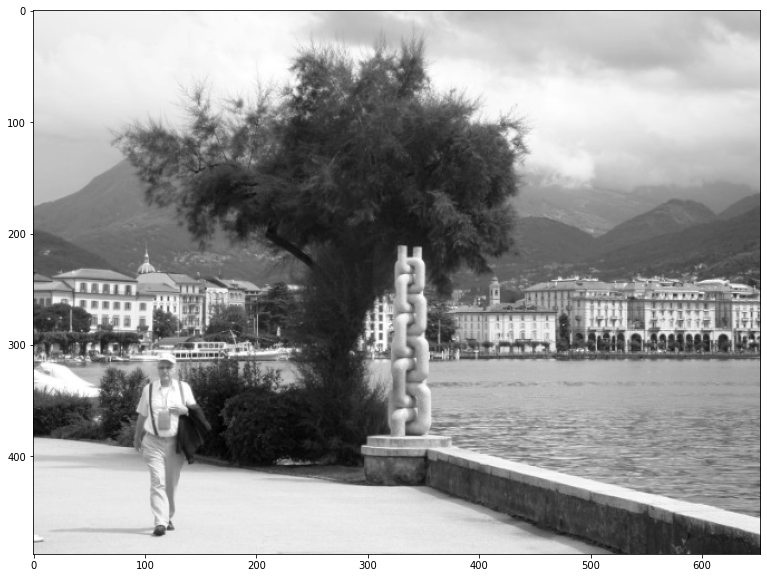

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 10))
imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [178]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

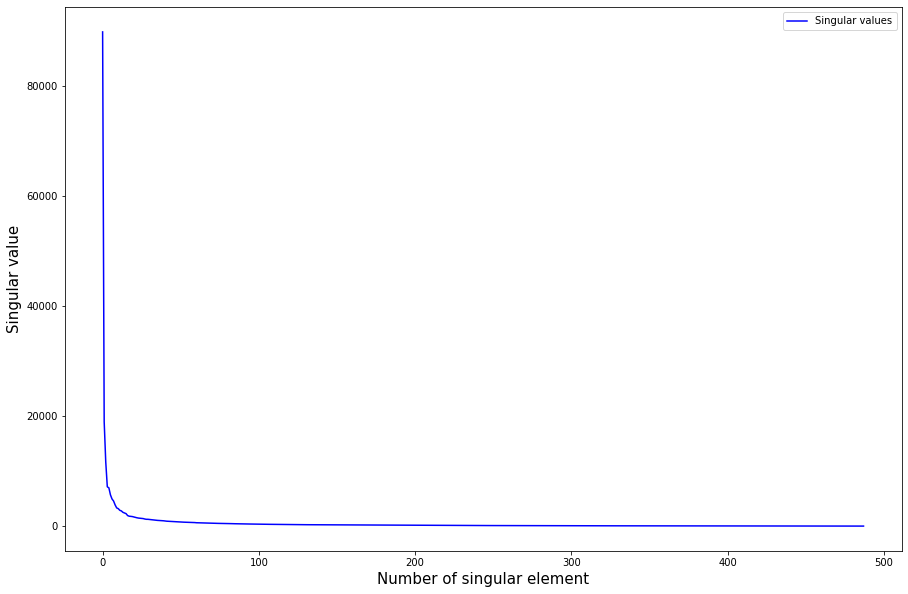

In [179]:
Y_arr = S
X_arr = [i for i in range(1, S.size + 1)]

plt.figure(figsize=(15, 10))
plt.plot(Y_arr, color='blue', label='Singular values')
plt.title('')
plt.ylabel('Singular value', fontsize=15)
plt.xlabel('Number of singular element', fontsize=15)
plt.legend()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

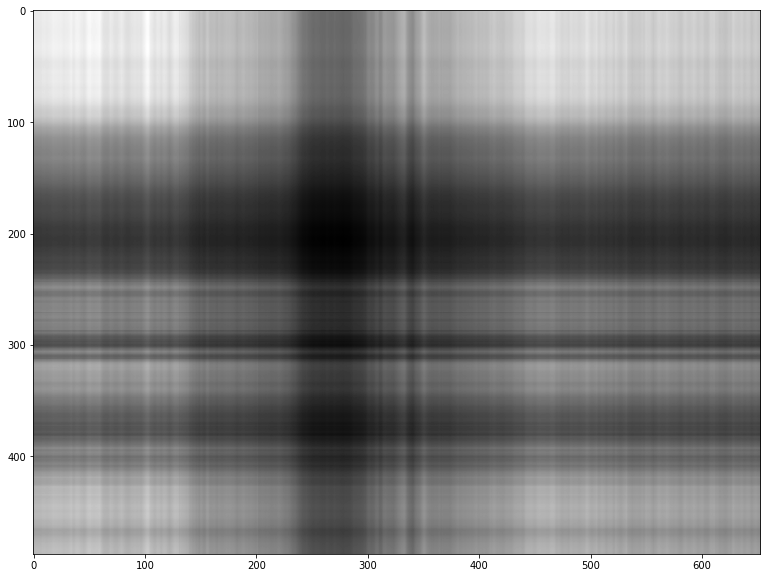

In [180]:
def GetRanks (l, r):
    u = U[:, range(l, r)]
    s = np.diag(S)[l:r, l:r]
    vt = VT[range(l, r), :]
    A_r = u @ s @ vt
    return A_r


plt.figure(figsize=(15, 10))
imgplot = plt.imshow(GetRanks(0, 1), cmap='gray')

В целом, результат довольно ожидаемый. Хоть мы и берем самое больше сингулярное значение из разложения $$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$, оно не может в хорошем качестве приблизить нашу исходную матрицу. Даже при условии, что сингулярные значения достаточно быстро убывают, они так или иначе вносяд "вклад" в приближение матрицы. Таким образом, забивая на все меньшие значения, мы получаем только очертания нашей исходной картинки (примерное расположение объектов и их цвет в чб гамме)


**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

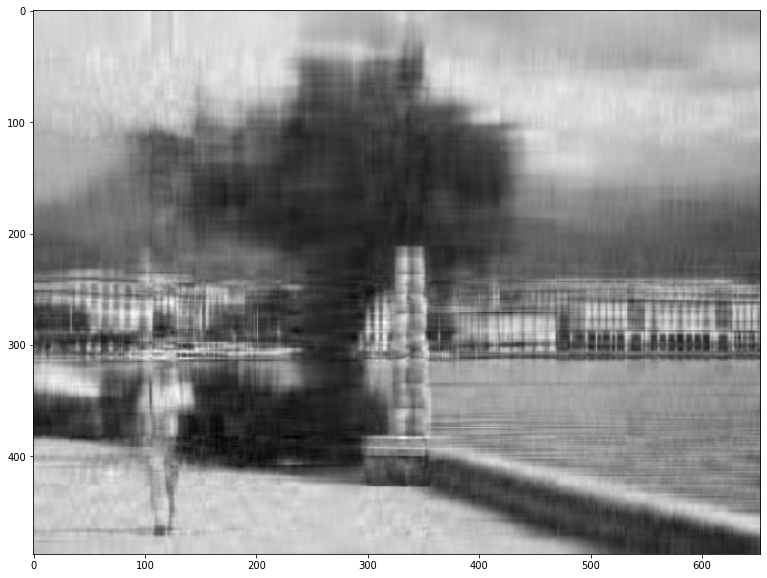

In [181]:
plt.figure(figsize=(15, 10))
img1_20 = plt.imshow(GetRanks(0, 20), cmap='gray')

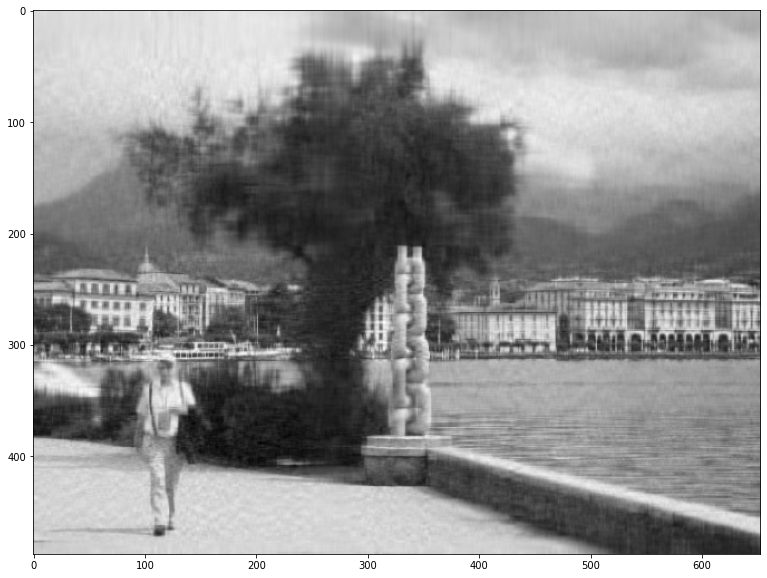

In [182]:
plt.figure(figsize=(15, 10))
img1_50 = plt.imshow(GetRanks(0, 50), cmap='gray')

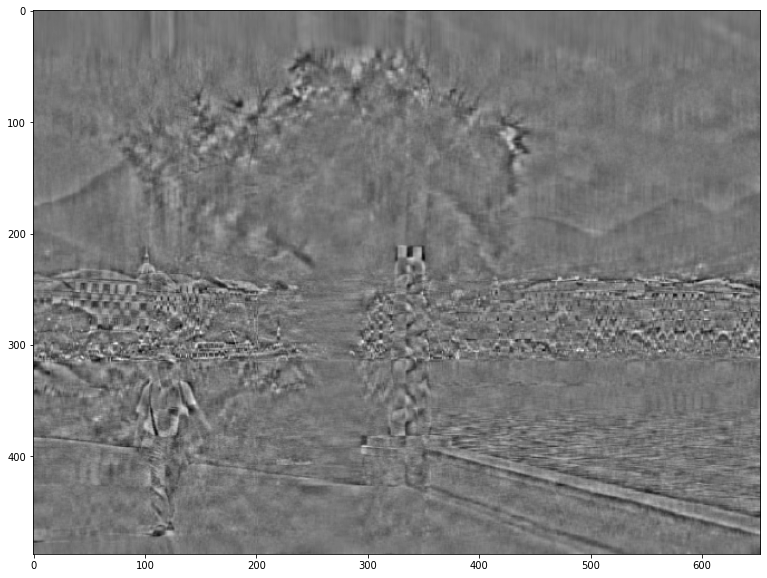

In [183]:
plt.figure(figsize=(15, 10))
img20_100 = plt.imshow(GetRanks(19, 100), cmap='gray')

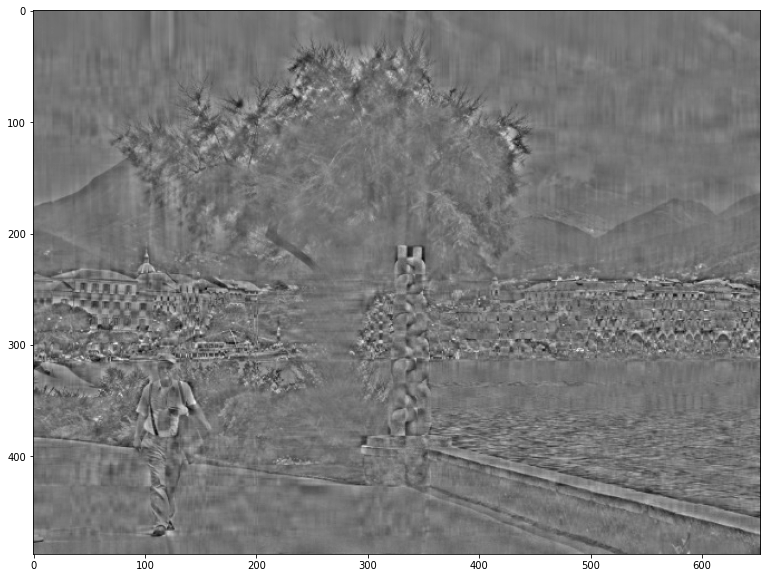

In [184]:
plt.figure(figsize=(15, 10))
img20_last = plt.imshow(GetRanks(19, img.shape[0]), cmap='gray')

Помним, что сингулярные значения достаточно быстро убывают, поэтому если мы будем брать бОльшие из них, то будем получать достаточно четкую картинку -- мы взяли первые 50 значений, и картинка была уже достаточно хорошего качества. Причем видно, что чем больше мы берем значений начиная с начала - тем лучше. Значения после нескольких самых больших уже меньше влияют на основной вид картинки, однако делают ее более четкой, что можно заметить по 3 и 4 графикам -- мы получаем маски с четкими границами, которые и позволяют улучшить качество.

В итоге получаем, что первые сингулярные значения наиболее значимы, и без них разложение будет плохо приближать исходную матрицу(картинку). При этом в купе с последующими значениями качество раложения будет улучшаться.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

Мы поняли, что нам обязательно нужно брать наибольшие значения из начальных, так как без них приближение будет очень плохим. Вопрос стоит в том, сколько брать маленьких значений, которые постепенно улучшают качество картинки, но в то же время занимают память. При выборе 50 первых значений мы получили уже нормальный результат, я попробовал взять 60, 70, 75, 80, 85 и 90 -- из всех этих вариантов мне больше всего понравился вариант с 75-ю значениями (он достаточно хорош по качеству, дальшейшие изменения не так заметны для глаза)



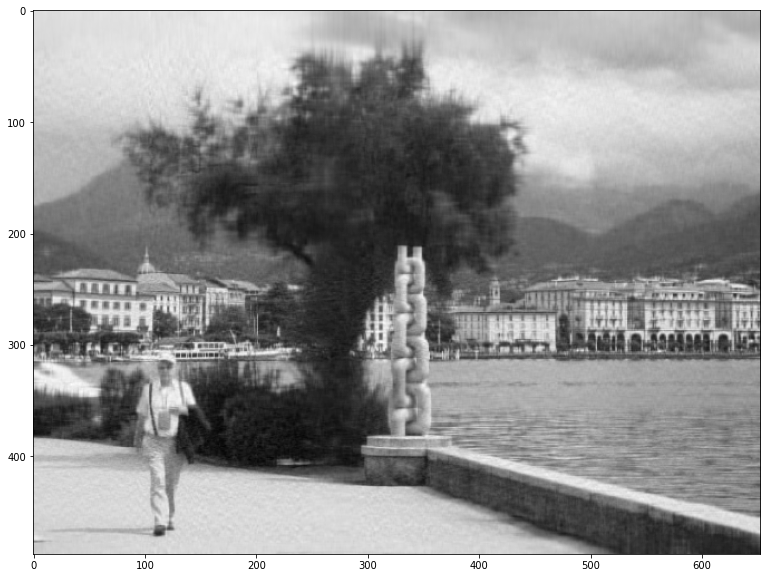

In [185]:
plt.figure(figsize=(15, 10))
img1_75= plt.imshow(GetRanks(0, 75), cmap='gray')

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В теории изначально мы хранили $n \cdot m$ памяти для хранения всей картинки, а при использовании $SVD$ разложения мы тратим $r \cdot (m + n + 1)$ памяти, где $n, m$ -- размеры картинки, а $r$ -- количество ненулевых сингулярных значений в используемом разложении


In [186]:

print('m = {}'.format(img.shape[0]))
print('n = {}'.format(img.shape[1]))
print('r = {}'.format(75))

m = 488
n = 653
r = 75


Тогда в теории нам потребуется $$\dfrac{n \cdot m}{r \cdot (m + n + 1)} \approx 3,72 $$ раз меньше памяти

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [187]:
import sys
U_r = U[:, 0:75]
S_r = S[0:75]
VT_r = VT[:, 0:75]

print('origin: {}'.format(img.nbytes))
print('reduced: {}'.format(U_r.nbytes + S_r.nbytes + VT_r.nbytes))
print('origin / reduced = {}'.format((img.nbytes / (U_r.nbytes + S_r.nbytes + VT_r.nbytes))))

origin: 2549312
reduced: 586200
origin / reduced = 4.348877516206073


╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В итоге получили, что по факту мы сократили память почти в 4,5 раз, хотя в теории было только 3,7. Возможно, комп выделил больше памяти под изначальную картинку (потому что не нашел подходящего куска свободной памяти), из-за чего ее размер стал больше

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Так как $X^TX$ -- симметричная матрица, в которой записаны скалярные произведения соответствующих столбцов матрицы $X$, то эту матрицу можно воспринимать, как матрицу линейного оператора $\phi$. Он будет диагонализуем $\Rightarrow$ сможем найти ортонормированный базис $v_1, \dots, v_n$, в котором матрица оператора $\phi$ имеет диагональный вид $diag(\sigma_1^2, \dots, \sigma_n^2)$


Пусть $$ w \in \langle v_{1}, \ldots, v_n \rangle \Rightarrow w = a_1v_1 + \ldots + a_nv_n \Rightarrow |w|^2 = a_1^2 + \ldots + a_n^2$$

При этом мы знаем, что 

$$ |Xw|^2 = (Xw)^T\cdot(Xw) = w^TX^TXw = w^T \cdot (X^TXw)    $$

$$ X^TXw = X^TX (a_1v_1 + \ldots + a_nv_n) = a_1\sigma_1^2v_1 + \ldots + a_n\sigma_n^2v_n$$

Тогда, тк $\left( v_{1}, \ldots, v_n \right)$ - ортонормированный базис, получаем:

$$ |Xw|^2 = w^T \cdot (X^TXw) = a_1^2\sigma_1^2 + \ldots + a_n^2\sigma_n^2$$

Так как $\sigma_1^2$ - наибольшее сингулярное значение, то: 

$$ |Xw|^2 \leq \sigma_1^2(a_1^2 + \ldots + a_n^2) = \sigma_1^2\cdot |w|^2 \Leftrightarrow \frac{|Xw|^2}{|w|^2} \leq \sigma_1^2 \Leftrightarrow \frac{|Xw|}{|w|} \leq \sigma_1$$

Пусть $w = v_1$, тогда

$$ |Xv_1|^2 = v_1^T \cdot (X^TXv_1) = \sigma_1^2$$, так как $v_1$ -- нормированный собственный вектор



Итак,
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw|$$



Дальше пользуемся неравенством Коши-Буняковского

$$ |u^T Xv| = |(u, Xv)| \leq |u||Xv|\leq|u| |\sigma_1v| = \sigma_1|u||v| $$

Теперь мы хотим получить равенства:

1) Коши-Буняковский даст нам равенство в том случае, если $Xv$ и $u$ будут пропорциональны

2) Пусть $v$ -- собственный нормированный вектор матрицы $X^TX$, соответствующему собственному значению $\sigma_1^2$. В таком случае

$$|Xv|^2 = v^T \cdot (X^TXv) = v^T\cdot\sigma_1^2 v = \sigma_1^2\cdot v^Tv = \sigma_1^2|v|^2 = \sigma_1^2 \Rightarrow |Xv| = \sigma_1$$

Значит, возьмём $u = v$, и получим нужные равенства.

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортогональными столбцами размеров $n\times r$ и $r\times n$ соответственно, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сначала докажем, что ранг матрицы $A$ равен 1.

Заметим, что нулевая строка матрицы $A$ будет состоять только из нулей, так как $sin(0) = 0$. Теперь пусть у нас есть $k$-я и $m$-я строки (нумерация все так же с нуля), причем $k, m \ne 0$. Заметим, что если умножить $k$-ю строку на $\dfrac{sin(m)}{sin(k)}$, то мы получим в точности $m$-ю строку (умножить всегда можем, потому что $sin(k) \ne 0$). Но тогда мы сможем 1-й строкой "убить" все строки ниже, тем самым получив ранг 1 (нулевая строка из нулей, первая -- не из нулей, а остальные убили первой)


Теперь найдем усеченное $SVD$ разложение:

Заметим, что $A = U \cdot V^T$, где $U = \begin{pmatrix} sin(0) \\ sin(1) \\ \vdots \\ sin(n - 1)\end{pmatrix}$ и $V =\begin{pmatrix} cos(0) \\ cos(1) \\ \vdots \\ cos(n - 1)\end{pmatrix}$

<br/><br/>

Тогда положим $\sigma = |U| \cdot |V| = \sqrt{\sum_{i = 0}^{n - 1} (sin^2(i) \cdot cos^2(i))}$

<br/>

Пусть $U' = \begin{pmatrix} \dfrac{sin(0)}{|U|} \\ \vdots \\ \dfrac{sin(n - 1)}{|U|}\end{pmatrix} \quad $ и $ \quad V' = \begin{pmatrix} \dfrac{cos(0)}{|V|} \\ \vdots \\ \dfrac{cos(n - 1)}{|V|}\end{pmatrix} \Rightarrow A = U' \cdot \sigma \cdot V'^T$, причем $U'$ и $V'$ — ортогональные

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

A) Докажем, что  $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.
$$ A = U \Sigma V^T \Leftrightarrow AV = U \Sigma V^TV \Leftrightarrow AV = U\Sigma $$ в силу того, что $V$ -- ортогональная матрица


----

$rkA = r \Rightarrow \Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r, 0, \ldots, 0)$. Тогда в матрице $U \Sigma$ первые r столбцов будут ненулевые, а столбцы под номерами $r + 1, \ldots, n$ будут нулевые. Проще говоря, первые r векторов из системы $\left( v_{1}, \ldots, v_n \right)$ отображаются в ненулевые векторы, а оставшиеся переходят в нулевые векторы. В силу того, что $\left( v_{1}, \ldots, v_n \right)$ - базис всего простнства, то 

$$\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$$.

Б) Докажем, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$.

Доказали, что $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$, тогда образы  векторов $\left( v_{1}, \ldots, v_r \right)$ образуют базис образа. По алгоритму поиска SVD для векторов $\left( v_{1}, \ldots, v_r \right)$ мы полагаем, что $u_i := \frac{1}{\sigma_i}Av_i$. Другими словами, $u_i$ - это образ вектора $v_i$ с точностью до ненулевой константы. А значит мы получим набор образов векторов $\left( v_{1}, \ldots, v_r \right)$ с точностью до константы, а этот набор образов в свою очередь и будет базисом образа. Таким образом, 

$$\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$$.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$. Тогда так как столбцы A линейно независимы, то $rkA = n$, а значит и $rk\Sigma = n$.

$$A = U \Sigma V^T \Leftrightarrow A^T = V \Sigma^T U^T \Rightarrow A^T \cdot A = V \Sigma^T V^T \cdot  U \Sigma U^T \Leftrightarrow(A^T \cdot A)^{-1} = (V \Sigma^T V^T \cdot  U \Sigma U^T)^{-1} $$

Тогда $$P = U \Sigma V^T (V \Sigma^T U^T U \Sigma V^T)^{-1} V \Sigma^T U^T = U \Sigma (\Sigma^T \Sigma)^{-1} \Sigma^T U^T$$

в силу того, что $V^TV = E = U^TU$ и $(X \cdot Y)^{-1} = Y^{-1}\cdot X^{-1}$

Найдем матрицу $\Sigma (\Sigma^T \Sigma)^{-1} \Sigma^T$:
\begin{equation*}
\Sigma^T \Sigma = \left(
\begin{array}{cccc}
\sigma_{1} & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\
0 & \sigma_{2} & \ldots & 0 & \ldots & 0 & 0 & 0 \\
\vdots & \vdots & \vdots  & \vdots  & \ldots & \vdots & \vdots & \vdots\\
0 & 0 & \ldots & \sigma_{n} & \ldots & 0 & 0 & 0
\end{array}
\right) \left(
\begin{array}{cccc}
\sigma_{1} & 0 & \ldots & 0\\
0 & \sigma_{2} & \ldots & 0 \\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & \sigma_{n}\\
0 & 0 & \ldots & 0\\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & 0\\
\end{array}
\right) =
\left(
\begin{array}{cccc}
\sigma_{1}^2 & 0 & \ldots & 0\\
0 & \sigma_{2}^2 & \ldots & 0 \\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & \sigma_{n}^2\\
\end{array}
\right)
\Rightarrow 
(\Sigma^T \Sigma)^{-1} =  
\left(
\begin{array}{cccc}
\sigma_{1}^{-2} & 0 & \ldots & 0\\
0 & \sigma_{2}^{-2} & \ldots & 0 \\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & \sigma_{n}^{-2}\\
\end{array}
\right) 
\end{equation*} 




\begin{equation*}
\Sigma (\Sigma^T \Sigma)^{-1} = \left(
\begin{array}{cccc}
\sigma_{1} & 0 & \ldots & 0\\
0 & \sigma_{2} & \ldots & 0 \\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & \sigma_{n}\\
0 & 0 & \ldots & 0\\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & 0\\
\end{array}
\right) 
\left(
\begin{array}{cccc}
\sigma_{1}^{-2} & 0 & \ldots & 0\\
0 & \sigma_{2}^{-2} & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \ldots & \sigma_{n}^{-2}\\
\end{array}
\right) = \left(
\begin{array}{cccc}
\sigma_{1}^{-1} & 0 & \ldots & 0 \\
0 & \sigma_{2}^{-1} & \ldots & 0 \\
\vdots & \vdots & \ldots  & \vdots\\
0 & 0 & \ldots & \sigma_{n}^{-1}\\
0 & 0 & \ldots & 0\\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & 0\\
\end{array}
\right)
\end{equation*} 


\begin{equation*}
\Sigma (\Sigma^T \Sigma)^{-1} \Sigma^T = \left(
\begin{array}{cccc}
\sigma_{1}^{-1} & 0 & \ldots & 0 \\
0 & \sigma_{2}^{-1} & \ldots & 0 \\
\vdots & \vdots & \ldots  & \vdots\\
0 & 0 & \ldots & \sigma_{n}^{-1}\\
0 & 0 & \ldots & 0\\
\vdots & \vdots & \ldots & \vdots\\
0 & 0 & \ldots & 0\\
\end{array}
\right) \left(
\begin{array}{cccc}
\sigma_{1} & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\
0 & \sigma_{2} & \ldots & 0 & \ldots & 0 & 0 & 0 \\
\vdots & \vdots & \ldots  & \ldots  & \ldots & \vdots & \vdots & \vdots\\
0 & 0 & \ldots & \sigma_{n} & \ldots & 0 & 0 & 0
\end{array}
\right) = \left(
\begin{array}{cccc}
1 & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\
0 & 1 & \ldots & 0 & \ldots & 0 & 0 & 0\\
\vdots & \vdots & \ldots  & \vdots & \ldots & \vdots & \vdots  & \vdots\\
0 & 0 & \ldots & 1 & \ldots & 0 & 0 & 0\\
0 & 0 & \ldots & 0 & \ldots & 0 & 0 & 0\\
\vdots & \vdots & \ldots & \vdots & \ldots & \vdots & \vdots & \vdots\\
0 & 0 & \ldots & 0 &\ldots & 0 & 0 & 0\\
\end{array}
\right)
\end{equation*} 

Получили матрицу размера  $m \times m$ с неубывающими элементами на диагонали. Матрицы $U$, $U^{T}$ ортогональны $\Rightarrow$ получаем искомое разложение 

$$P = U \cdot \Sigma_1 \cdot U^T$$, где $$\Sigma_1 = \Sigma (\Sigma^T \Sigma)^{-1} \Sigma^T$$

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


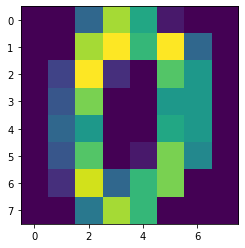

In [188]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [189]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U_d, S_d, VT_d = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

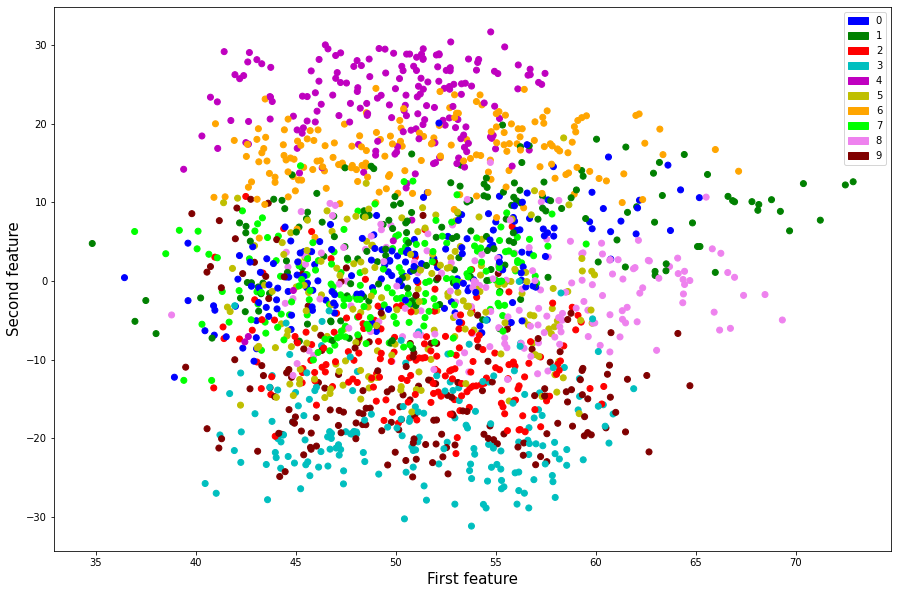

In [190]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 

import matplotlib.patches as mpatches
b_p = mpatches.Patch(color='b', label='0')
g_p = mpatches.Patch(color='g', label='1')
r_p = mpatches.Patch(color='r', label='2')
c_p = mpatches.Patch(color='c', label='3')
m_p = mpatches.Patch(color='m', label='4')
y_p = mpatches.Patch(color='y', label='5')
orange_p = mpatches.Patch(color='orange', label='6')
lime_p = mpatches.Patch(color='lime', label='7')
violet_p = mpatches.Patch(color='violet', label='8')
maroon_p = mpatches.Patch(color='maroon', label='9')
h = [b_p, g_p, r_p, c_p, m_p, y_p, orange_p, lime_p, violet_p, maroon_p]

X = U_d @ np.diag(S_d)
x1, x2 = X[:, 0], X[:, 1]

colors = np.array(['b','g', 'r', 'c', 'm', 'y', 'orange', 'lime', 'violet', 'maroon'])
nums = np.array(digits.target)

for i in range(digits.data.shape[0]):
    nums = np.append(nums, digits.target[i])
main_colors = np.zeros(0, str)
for i in range(digits.data.shape[0]):
    main_colors = np.append(main_colors, colors[nums[i]])
    
plt.figure(figsize=(15, 10))
plt.scatter(np.array(x1), np.array(x2), color = main_colors) 
plt.xlabel(r'First feature', fontsize=15)
plt.ylabel(r'Second feature', fontsize=15)

plt.legend(handles=h)

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

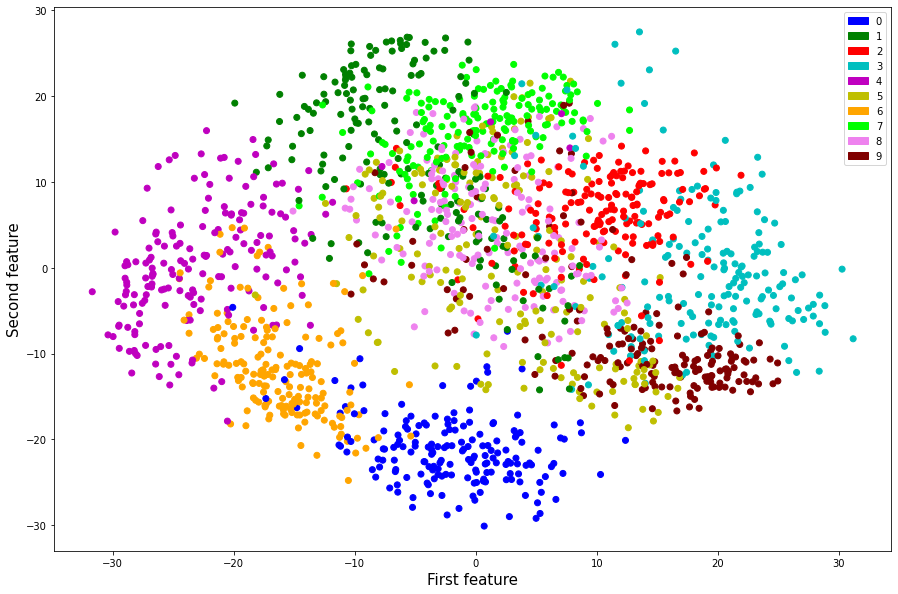

In [191]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ 

import matplotlib.patches as mpatches
b_p = mpatches.Patch(color='b', label='0')
g_p = mpatches.Patch(color='g', label='1')
r_p = mpatches.Patch(color='r', label='2')
c_p = mpatches.Patch(color='c', label='3')
m_p = mpatches.Patch(color='m', label='4')
y_p = mpatches.Patch(color='y', label='5')
orange_p = mpatches.Patch(color='orange', label='6')
lime_p = mpatches.Patch(color='lime', label='7')
violet_p = mpatches.Patch(color='violet', label='8')
maroon_p = mpatches.Patch(color='maroon', label='9')
h = [b_p, g_p, r_p, c_p, m_p, y_p, orange_p, lime_p, violet_p, maroon_p]

U_d2, S_d2, VT_d2 = svd(digits.data - digits.data.mean(axis = 0), full_matrices=False)
X_d2 = U_d2 @ np.diag(S_d2)
x3, x4 = X_d2[:, 0], X_d2[:, 1]

colors = np.array(['b','g', 'r', 'c', 'm', 'y', 'orange', 'lime', 'violet', 'maroon'])
nums = np.array(digits.target)

for i in range(digits.data.shape[0]):
    nums = np.append(nums, digits.target[i])
main_colors = np.zeros(0, str)
for i in range(digits.data.shape[0]):
    main_colors = np.append(main_colors, colors[nums[i]])
    
plt.figure(figsize=(15, 10))
plt.scatter(np.array(x3), np.array(x4), color = main_colors)
plt.xlabel(r'First feature', fontsize=15)
plt.ylabel(r'Second feature', fontsize=15)

plt.legend(handles=h)

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

В первом случае мы наблюдаем достаточно сильный разброс значений признаков, точки одинакового цвета расположены хаотично, все друг на друга наслаиваться. Однако во втором случае заметно сильное улучшение кучности значений -- точки одного цвета расположились по группам близко друг к другу. Такой исход будет более благоприятным для обучения машин, потому что с большей кучностью будет проще определить более правильную зависимость, нежели с разбросанными по плоскости точками.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

Text(0, 0.5, 'Second feature')

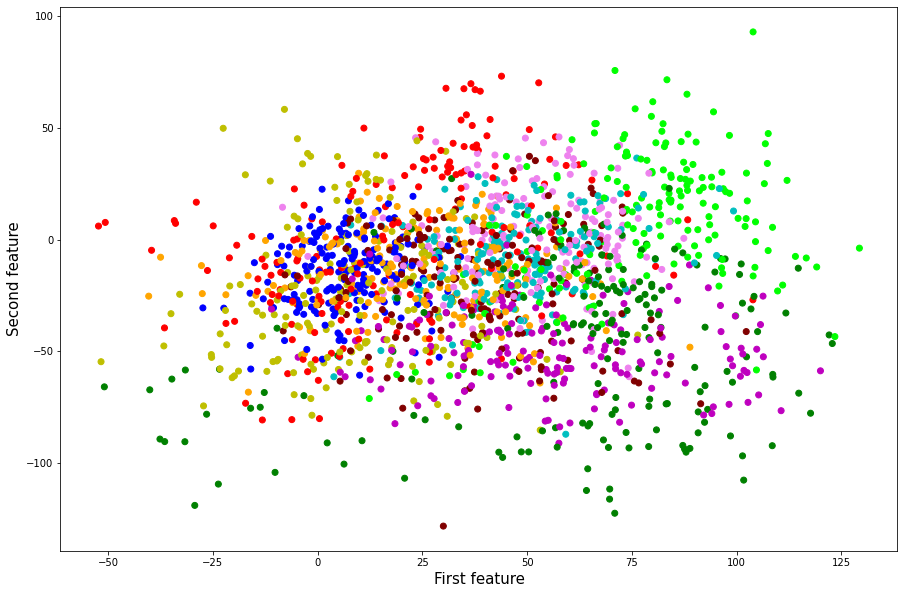

In [192]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.random_projection import GaussianRandomProjection
rng = np.random.RandomState(42)
transformer = GaussianRandomProjection(n_components = 2)
data_new = transformer.fit_transform(digits.data)

colors_3 = np.array(['b','g', 'r', 'c', 'm', 'y', 'orange', 'lime', 'violet', 'maroon'])
nums_3 = np.array(digits.target)

for i in range(digits.data.shape[0]):
    nums_3 = np.append(nums_3, digits.target[i])
main_colors_3 = np.zeros(0, str)
for i in range(digits.data.shape[0]):
    main_colors_3 = np.append(main_colors_3, colors_3[nums_3[i]])
    
plt.figure(figsize=(15, 10))
plt.scatter(np.array(data_new[:, 0]), np.array(data_new[:, 1]), color = main_colors_3) 
plt.xlabel(r'First feature', fontsize=15)
plt.ylabel(r'Second feature', fontsize=15)

Тут видим все тот же разброс точек, абсолютный хаос. Более того, из-за рандомного разложения иногда получаются совершенно разные картинки (одни более скучкованные, другие -- растянутые)

В этом случае выигрывает SVD, так как в сингулярном разложении видна бОльшая кучность и лучшее распределение по группам, чем при использовании гаусовских проекций

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, я сгененерирую много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построю аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`.

In [193]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [194]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

Я хз, что тут за ошибка снизу, но график вроде нормальный строит

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

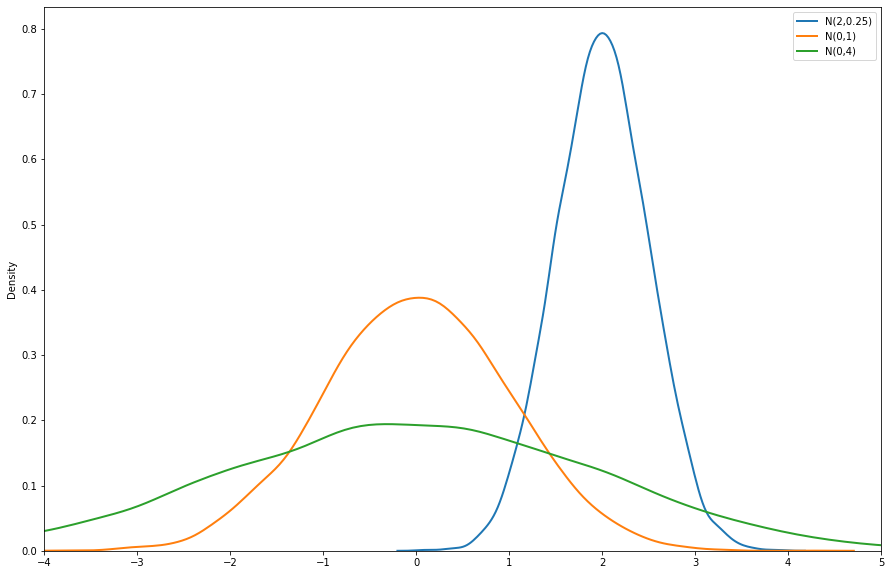

In [195]:
N = 10000
plt.figure(figsize=(15, 10))
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**1. [1.5 балла]** Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Докажите, что поверхности уровня $p(x) = c$ — это эллипсоиды.



╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = c \Leftrightarrow \ln \left[\dfrac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\right] = \ln(c) \Leftrightarrow \ln\left[\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}\right]+\ln e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = \ln(c) \Leftrightarrow$$ 

<br/>

$$\Leftrightarrow -\frac12(x - a)^T\Sigma^{-1}(x - a) = \ln(c) - \ln\left[\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}\right] = A < 0 \text{$\quad$ так как вероятности не больше единицы}$$

<br/><br/>

Kовариационная матрица положительно определена $\Rightarrow$ $\exists$ базис, в котором она имеет диагональный вид с положительными элементами на диагонали:

$$\Sigma' = diag(\sigma_1^2, \ldots, \sigma_n^2) \Leftrightarrow \left(\Sigma'\right)^{-1} = diag\left(\frac{1}{\sigma_1^2}, \ldots, \frac{1}{\sigma_n^2}\right)$$

<br/><br/>

Тогда, перейдя к новому базису, имеем:

$$(x - a)^T\left(\Sigma'\right)^{-1}(x - a) = \dfrac{(x_1 - a_1)^2}{\sigma_1^2} + \dots + \dfrac{(x_n - a_n)^2}{\sigma_n^2} = -2A = B > 0$$

<br/>

Тогда имеем:

$$\dfrac{(x_1 - a_1)^2}{\sigma_1^2 \cdot B} + \dots + \dfrac{(x_n - a_n)^2}{\sigma_n^2 \cdot B}=  1 \text{ — уравнение эллипсоида}$$

**2. [1.5 балла]** Пользуясь теоремой о приведении квадратичной формы к главным осям, докажите, что функцию плотности многомерного нормального распределения можно представить в виде произведения одномерных нормальных плотностей. В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Можем привести матрицу $\Sigma$ к диагональному виду $\Rightarrow$ имеем матрицу $\Sigma'$, т. что:

$$-\dfrac{1}{2}(x - a)^T\left(\Sigma'\right)^{-1}(x - a) = -\dfrac{1}{2} \left[\dfrac{(x_1 - a_1)^2}{\sigma_1^2} + \dots + \dfrac{(x_n - a_n)^2}{\sigma_n^2}\right]$$

Положим $b_i := \dfrac{(x_1 - a_1)^2}{\sigma_1^2}$, тогда:

<br/>

$$ p(x) = \dfrac1{(2\pi)^{n/2}|\Sigma'|^{1/2}}e^{-\dfrac12(x - a)^T\Sigma'^{-1}(x - a)} = \dfrac1{(2\pi)^{n/2}(\sigma_1^2 \cdot \ldots \cdot \sigma_n^2)^{1/2}}e^{-\dfrac12(b_1+\ldots+b_n)} = \dfrac1{(2\pi)^{1/2}(\sigma_1^2)^{1/2}}e^{-\dfrac12 b_1}\cdot\ldots\cdot\dfrac1{(2\pi)^{1/2}(\sigma_n^2)^{1/2}}e^{-\dfrac12 b_n}=$$

<br/>

$$ = \dfrac1{(2\pi)^{1/2}(\sigma_1^2)^{1/2}}e^{-\dfrac12\dfrac{(x_1 - a_1)^2}{\sigma_1^2}}\cdot\ldots\cdot\dfrac1{(2\pi)^{1/2}(\sigma_n^2)^{1/2}}e^{-\dfrac12\dfrac{(x_n - a_n)^2}{\sigma_n^2}} = \dfrac1{\sqrt{2\pi\sigma_1^2}}e^{-\dfrac{(x_1 - a_1)^2}{2\sigma_1^2}}\cdot\ldots\cdot\dfrac1{\sqrt{2\pi\sigma_n^2}}e^{-\dfrac{(x_n - a_n)^2}{2\sigma_n^2}} $$

Получаем в точности произведение одномерных нормальных плотностей


А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

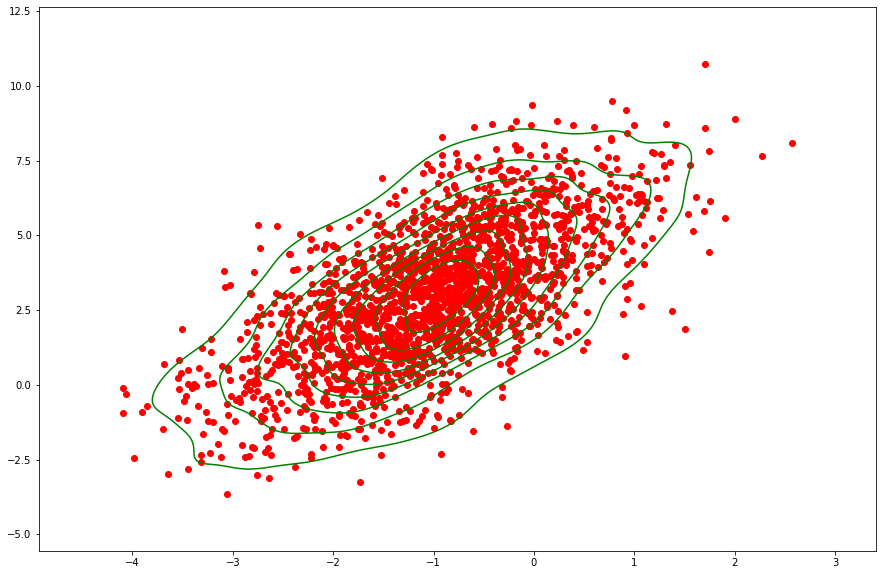

In [196]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)

plt.figure(figsize=(15, 10))
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s[:,0], s[:,1], shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**3. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [222]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

N = 1000
X_1000 = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

**4. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


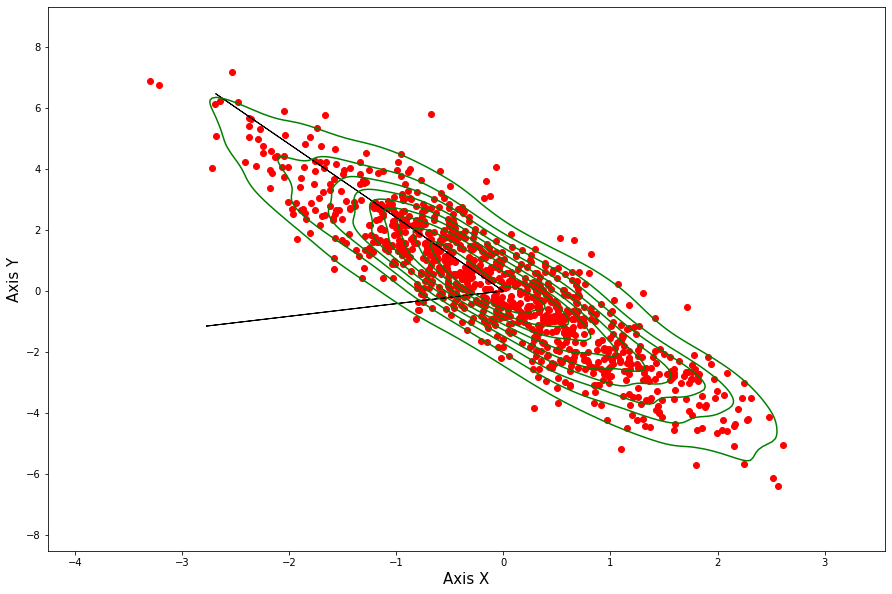

In [223]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

xU, xS, xVT = svd(X_1000, full_matrices=False)

plt.figure(figsize=(15, 10))
plt.scatter(X_1000[:,0], X_1000[:,1], color='red')
sns.kdeplot(X_1000[:,0], X_1000[:,1], shade=False, color='g')
plt.arrow(0, 0, 7 * xVT[0, 0], 7 * xVT[0, 1])
plt.arrow(0, 0, 3 * xVT[1, 0], 3 * xVT[1, 1])
plt.xlabel(r'Axis X', fontsize=15) 
plt.ylabel(r'Axis Y', fontsize=15)

plt.show()

**5. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

$$\chi(t) = (1 - t) \cdot ( 5 - t) - 4 = t^2 - 6t + 1 $$
$$D = 36 - 4 \cdot 1 \cdot 1 = 32 \Rightarrow t_1 = 3 + \sqrt{8}, \quad t_2 = 3 - \sqrt{8}$$

<br/>
Найдём собственные векторы:


1. $t_{1} = 3 + \sqrt{8} \Rightarrow$ ищем ФСР системы $(\Sigma - t_1 \cdot E)v = 0$

$$
\begin{pmatrix}
-2-\sqrt{8} && -2\\
-2 && 2 - \sqrt{8}
\end{pmatrix}
\to
\begin{pmatrix}
1 && -1+\sqrt{2}\\
0 && 0
\end{pmatrix}
\Rightarrow
e_1 = 
\dfrac{1}{\sqrt{4 - 2\sqrt{2}}}
\begin{pmatrix}
1 - \sqrt{2}\\
1
\end{pmatrix}
$$

2. $t_{2} = 3 - \sqrt{8} \Rightarrow$ ищем ФСР системы $(\Sigma - t_1 \cdot E)v = 0$

$$
\begin{pmatrix}
-2+\sqrt{8} && -2\\
-2 && 2 + \sqrt{8}
\end{pmatrix}
\to
\begin{pmatrix}
1 && -1-\sqrt{2}\\
0 && 0
\end{pmatrix}
\Rightarrow
e_2 = 
\dfrac{1}{\sqrt{4 + 2\sqrt{2}}}
\begin{pmatrix}
1 + \sqrt{2}\\
1
\end{pmatrix}
$$

Можно увидеть, что направления примерно совпадают

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**6. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

/var/folders/_4/0y5v_cz526q0mqk7ld23wxq40000gn/T/ipykernel_737/1487468732.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
/var/folders/_4/0y5v_cz526q0mqk7ld23wxq40000gn/T/ipykernel_737/1487468732.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)


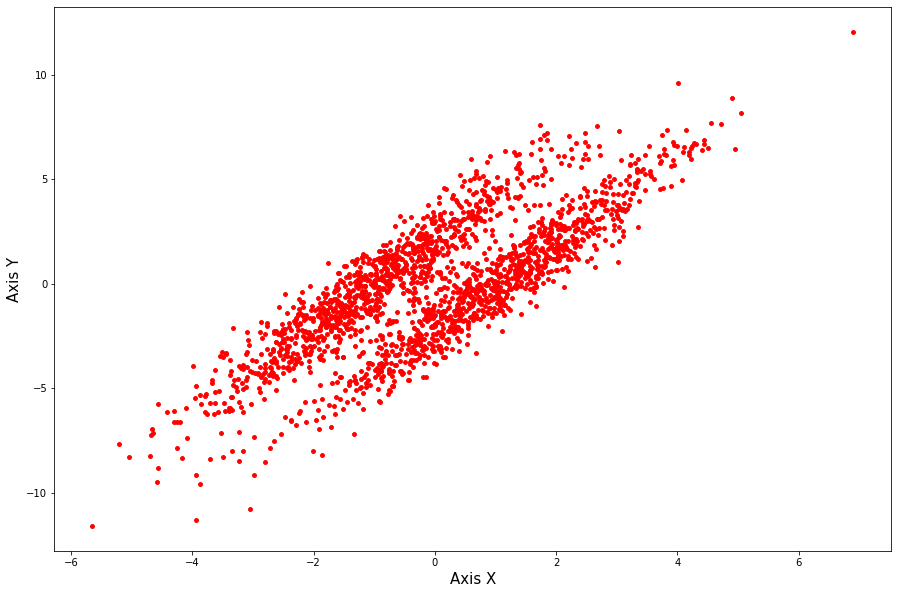

In [224]:
N = 1000
Sigma = np.array([[1.8, 4.3],[4.25, 9.16]])
plt.figure(figsize = (15, 10))
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)
plt.scatter(s1[:,0], s1[:,1], color='red', s = 15)
plt.scatter(s2[:,0], s2[:,1], color='red', s = 15)
plt.xlabel(r'Axis X', fontsize=15) 
plt.ylabel(r'Axis Y', fontsize=15)

plt.show()

**7. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

/var/folders/_4/0y5v_cz526q0mqk7ld23wxq40000gn/T/ipykernel_737/3728199054.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
/var/folders/_4/0y5v_cz526q0mqk7ld23wxq40000gn/T/ipykernel_737/3728199054.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)


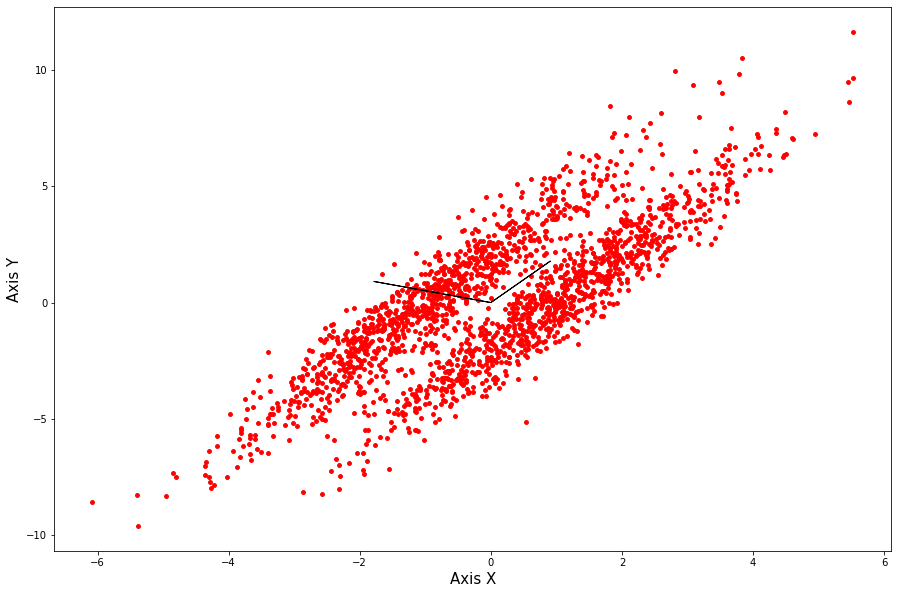

In [225]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

N = 1000
Sigma = np.array([[1.8, 4.3],[4.25, 9.16]])
plt.figure(figsize = (15, 10))
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)
nX = np.concatenate((s1, s2), axis = 0)
nU, nS, nVT = svd(nX, full_matrices=False)
plt.scatter(s1[:,0], s1[:,1], color='red', s = 15)
plt.scatter(s2[:,0], s2[:,1], color='red', s = 15)
plt.arrow(0, 0, 2 * nVT[0, 0], 2 * nVT[0, 1])
plt.arrow(0, 0, 2 * nVT[1, 0], 2 *  nVT[1, 1])
plt.xlabel(r'Axis X', fontsize=15) 
plt.ylabel(r'Axis Y', fontsize=15)
plt.show()

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**8. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если провести прямую через один из векторов, то она примерно разделит два этих кластера. То есть можно воспользоваться уравнением этой прямой и, подставляя "координаты" наших признаков, получать на выходе знак -- выше или ниже прямой находится наш признак

/var/folders/_4/0y5v_cz526q0mqk7ld23wxq40000gn/T/ipykernel_737/3527195473.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
/var/folders/_4/0y5v_cz526q0mqk7ld23wxq40000gn/T/ipykernel_737/3527195473.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)


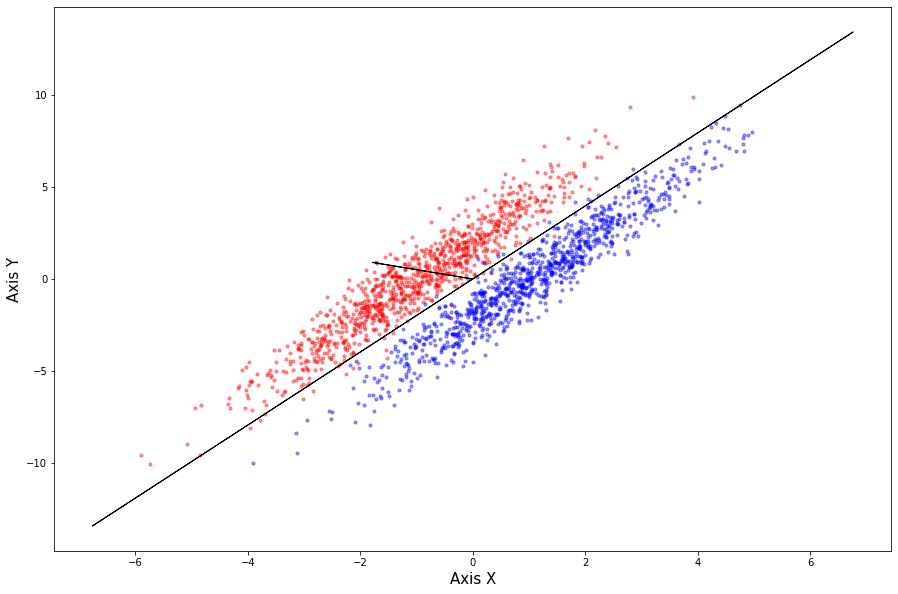

In [161]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

N = 1000
Sigma = np.array([[1.8, 4.3],[4.25, 9.16]])
plt.figure(figsize = (15, 10))
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov = Sigma, size = N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov = Sigma, size = N)
nX = np.concatenate((s1, s2), axis = 0)
nU, nS, nVT = svd(nX, full_matrices=False)
plt.scatter(s1[:,0], s1[:,1], color='red', s = 10, alpha=0.4)
plt.scatter(s2[:,0], s2[:,1], color='blue', s = 10,  alpha=0.4)
plt.arrow(0, 0, 15 * nVT[0, 0], 15 * nVT[0, 1])
plt.arrow(0, 0, -15 * nVT[0, 0], -15 * nVT[0, 1])
plt.arrow(0, 0, 2 * nVT[1, 0], 2 *  nVT[1, 1])
plt.xlabel(r'Axis X', fontsize=15) 
plt.ylabel(r'Axis Y', fontsize=15)
plt.show()

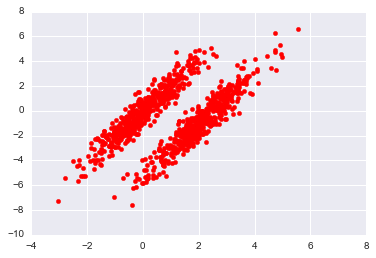

In [ ]:
# Just keep this image as a sample

**9. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [245]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
N = 1000
X_13 = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)

**10. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Элементы вне главной диагонали нулевые, тогда новые значения будут получаться сужением или растягиванием исходных значений $\Rightarrow$ направления будут параллельны осям координат

**11. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


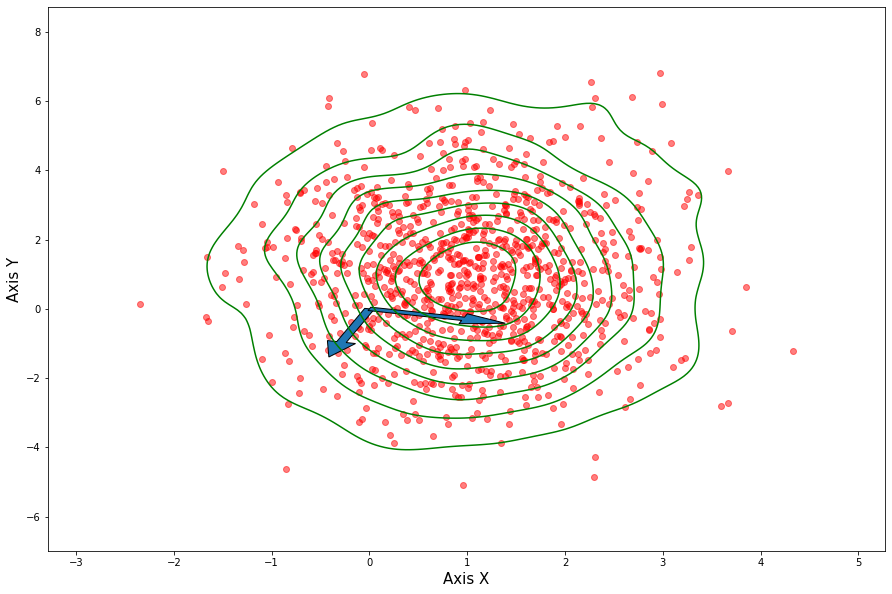

In [246]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
xU, xS, xVT = svd(X_13, full_matrices=False)

plt.figure(figsize=(15, 10))
plt.scatter(X_13[:,0], X_13[:,1], color='red', alpha=0.5)
sns.kdeplot(X_13[:,0], X_13[:,1], shade=False, color='g')
plt.arrow(0, 0, xVT[0, 0], xVT[0, 1], width=0.1)
plt.arrow(0, 0, xVT[1, 0], xVT[1, 1], width=0.1)


plt.xlabel(r'Axis X', fontsize=15) 
plt.ylabel(r'Axis Y', fontsize=15)

plt.show()

**12. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Видим, что у нас векторы направления признаков не выходят из среднего значения признаков.

Делаем вывод, что нужно "нормировать" значения признаков, сдвигая их среднее значение в условное начало координат. Для этого из каждого значения признака мы должны будем вычесть среднее значение этого признака на выборке